# Exercise 12: Question 1

### Dataset- chichwts.txt
This dataset describes the attributes of chicks. The first column contains the weights of the chicks in a numeric value and the second column contains a character string which describes the type of feed they received.

#### Import Necessary Packages and Data

In [4]:
#Import packages
import numpy
import pandas
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
import plotnine
from plotnine import *

#Load Data
chicken=pandas.read_csv("chickwts.txt", sep=",")

### Part 1: Generate a Plot to Summarize Data

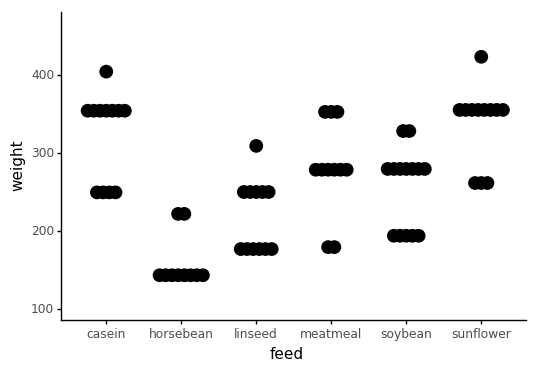

<ggplot: (7535692365)>


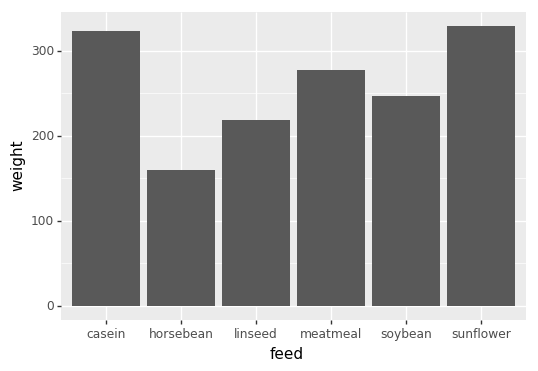

<ggplot: (7535781365)>


In [5]:
#Generate plot that shows the weights of chicks vs. feed type(scatter)
plot1= ggplot(chicken,aes(x="feed",y="weight"))+geom_dotplot(binaxis="y",stackdir="center", stackratio=0.5, dotsize=0.2)+theme_classic()

print plot1

#Generate plot that shows average weight vs. feed type (bar)
plot2= ggplot(chicken, aes(y="weight",x="feed"))+geom_bar(stat="summary",fun_y=numpy.mean)
print plot2

### Part 2: Null Hypotheses for Difference in Chick Weight (Soybean vs. Sunflower)

#### Hypotheses

* *Null Hypothesis*: There is no difference in chick weight when fed soybean or sunflower seed.
* *Alternative Hypothesis*: There is a significant difference in chick weight between those fed soybean feed and those fed sunflower seed.

In [6]:
#Subset the Data to Only Have the Types of Feed we are Interested in
chicksub=chicken.loc[chicken.feed.isin(['soybean', 'sunflower']),:]

#Make Dataframe for Modeling
chickFrame= pandas.DataFrame({'y':chicksub.weight,'x':0})
chickFrame.loc[chicksub.feed=='sunflower','x']=1

### Part 3: Test Null Hypothesis Using Likelihood Ratio Test

* Step 1: Define Null Model
* Step 2: Define Alternative Model
* Step 3: Run/Generate Likelihood Ratio Tests

In [12]:
#Define Null
def nllikeNull(pNull,obsNull):
    B0Null=pNull[0]
    sigmaNull=pNull[1]
    expectedNull=B0Null
    nllNull=-1*norm(expectedNull,sigmaNull).logpdf(obsNull.y).sum()
    return nllNull

#Define Alternative
def nlllikeAlt(pAlt,obsAlt):
    B0Alt=pAlt[0]
    B1Alt=pAlt[1]
    sigmaAlt=pAlt[2]
    expectedAlt=B0Alt+B1Alt*obsAlt.x
    nllAlt=-1*norm(expectedAlt,sigmaAlt).logpdf(obsAlt.y).sum()
    return nllAlt

In [8]:
#Null Model
initialGuessNull=numpy.array([1,1])
fitNullChickFrame=minimize(nllikeNull,initialGuessNull, method="Nelder-Mead",options={'disp':True},args=chickFrame)
print("Estimated Parameters: Null Model")
print(fitNullChickFrame.x)
print("NLL: Null Model")
nllNullChickFrame=fitNullChickFrame.fun
#Print NLL value for Null Model
print(nllNullChickFrame)

Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 85
         Function evaluations: 162
Estimated Parameters: Null Model
[ 284.49999051   64.53691755]
NLL: Null Model
145.240592097


In [13]:
#Alternative Model
initialGuessAlt=numpy.array([1,1,1])
fitAltChickFrame=minimize(nlllikeAlt,initialGuessAlt,method="Nelder-Mead",options={'disp':True},args=chickFrame)
print("Estimated Parameters: Alternative Model")
print(fitAltChickFrame.x)
print("NLL: Alternative Model")
nllAltChickFrame=fitAltChickFrame.fun
#Print NLL value for Alternative Model
print(nllAltChickFrame)

Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363
Estimated Parameters: Alternative Model
[ 246.42855057   82.48813575   49.73948886]
NLL: Alternative Model
138.469161825


### Part 4: Interpret Results of Likelihood Ratio Test

* Step 1: Calculate D value
* Step 2: Calculate p value

##### Conclusions:
As our p-value was less than 0.05, we can report that our alternative hypothesis was correct. This means that there is a significant difference between the chicks who were fed soybean feed vs. those who were fed sunflower feed.

In [14]:
#Calculate D value
DchickFrame=2*(nllNullChickFrame-nllAltChickFrame)
print("D Value")
print(DchickFrame)

#Calculate p value
pChickFrame=1-scipy.stats.chi2.cdf(x=DchickFrame,df=1)
print("p-value")
print(pChickFrame)

D Value
13.5428605444
p-value
0.000233176728695
